In [1]:
from shutil import copyfile
import os
print(os.getcwd())

/kaggle/working


In [2]:
## input 경로에 라이브러리 파일을 저장하자
copyfile(src = "../input/library/sklearnFunction.py", dst = "../working/sklearnFunction.py")

'../working/sklearnFunction.py'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearnFunction

In [4]:
df_train = pd.read_csv('../input/titanic/train.csv')
print(df_train.shape)
df_train.tail(3)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 학습 데이터는 891행 12열 구조로 되어 있구나

In [5]:
df_test = pd.read_csv('../input/titanic/test.csv')
print(df_test.shape)
df_test.head(3)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


## 테스트 데이터는 418행 11열 구조로 되어 있구나

### PassengerId가 id 이구나

In [6]:
df = pd.concat([df_train, df_test])

In [7]:
df.set_index('PassengerId', inplace=True)

In [8]:
df.index = df.index-1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


### Age, Fare, Cabin, Embarked에 결측치가 있다
### Age, Fare, Embarked는 평균으로 채우고 Cabin은 학습모델을 만들어 해결해 보자

In [10]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Embarked'].fillna('S', inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


### Name은 학습에 불필요 할 것 같다

In [13]:
df = df.drop(['Name'], axis=1)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

### Sex는 우선 숫자로 바꾸자

In [14]:
df['gender'] = df['Sex'].apply(lambda x : 0 if x=='male' else 1)
df = df.drop(['Sex'], axis=1)
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'gender'],
      dtype='object')

In [15]:
df.Ticket.value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

### Ticket은 도저히 사용 못하겠다

In [16]:
df = df.drop(['Ticket'], axis=1)
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'gender'],
      dtype='object')

In [17]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### Cabin은 첫번째 알파벳에 의미가 있는 것 같다

In [18]:
df['Cabin'] = df['Cabin'].apply(lambda x:str(x)[0:1])
df['Cabin'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

### 에고 결측치가 n이 되어 버렸네...

### Cabin은 Fare, Pclass, Sex, SibSp+Parch와 연관이 있을 것 같다

<AxesSubplot:xlabel='Cabin', ylabel='Fare'>

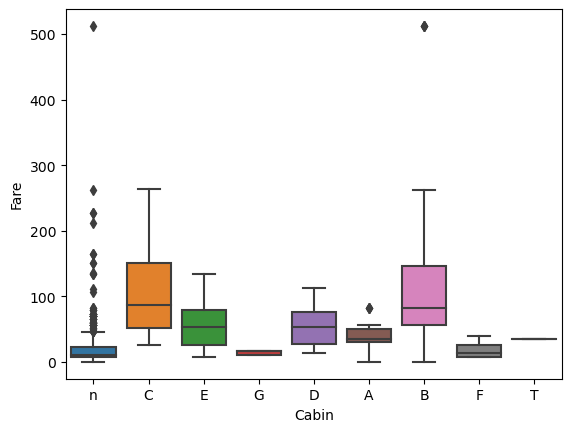

In [19]:
sns.boxplot(data=df, x='Cabin', y='Fare')

In [20]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Cabin', ylabel='Pclass'>

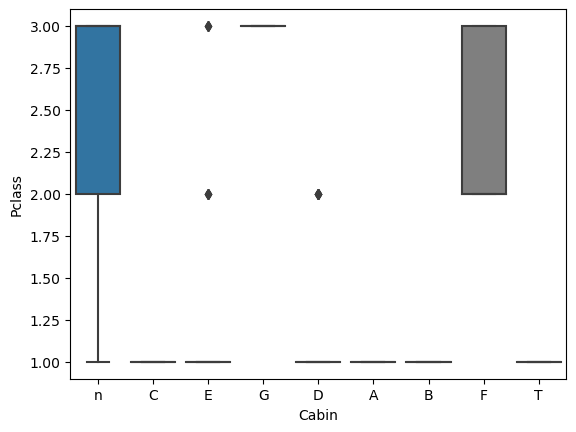

In [21]:
sns.boxplot(data=df, x='Cabin', y='Pclass')

<AxesSubplot:xlabel='Cabin', ylabel='count'>

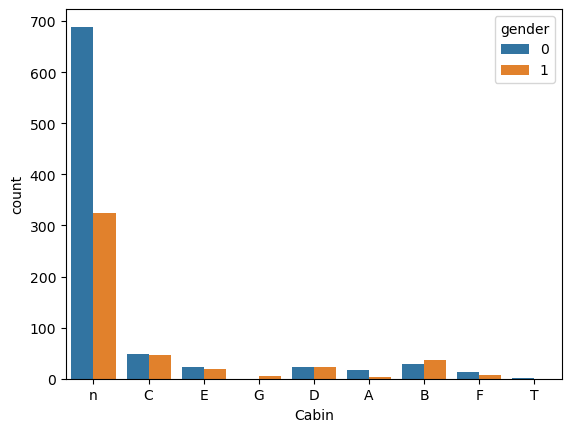

In [22]:
sns.countplot(data=df, x='Cabin', hue='gender')

In [23]:
df['Family'] = df['SibSp'] + df['Parch']

<AxesSubplot:xlabel='Cabin', ylabel='Family'>

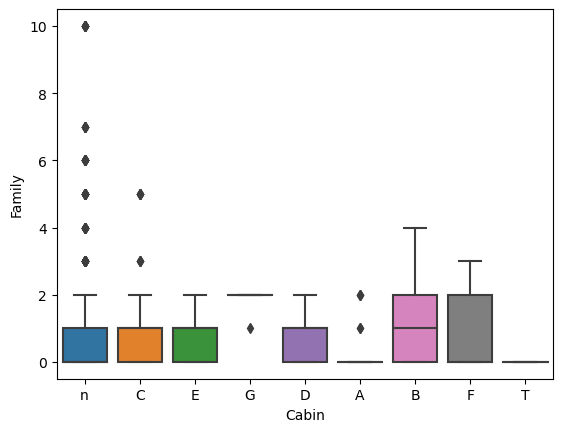

In [24]:
sns.boxplot(data=df, x='Cabin', y='Family')

In [25]:
df_cabin = df.copy()
df_cabin = df_cabin[['Fare', 'Pclass', 'gender', 'Family', 'Cabin']]

In [26]:
df_cabin = df_cabin[df_cabin['Cabin'] != 'n']
df_cabin.shape

(295, 5)

In [27]:
df_cabin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 1 to 1305
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fare    295 non-null    float64
 1   Pclass  295 non-null    int64  
 2   gender  295 non-null    int64  
 3   Family  295 non-null    int64  
 4   Cabin   295 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 13.8+ KB


### 잘모르겠다.. 그냥 학습시켜보자..

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_cabin[['Fare', 'Pclass', 'Family','gender']], df_cabin['Cabin'], random_state=16)
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5

In [30]:
n_list = df[df['Cabin'] == 'n'].index

In [31]:
df_sort = df[['Fare', 'Pclass', 'Family','gender']].iloc[n_list, :]

In [32]:
y_pred = rf_clf.predict(df_sort)
df_sort['Cabin'] = y_pred

In [33]:
df_sort['Cabin'].value_counts()

F    557
E    299
G     64
D     34
C     33
B     19
A      8
Name: Cabin, dtype: int64

In [34]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,gender,Family
PassengerId,,,,,,,,,,
0,0.0,3,22.0,1,0,7.2500,n,S,0,1
1,1.0,1,38.0,1,0,71.2833,C,C,1,1
2,1.0,3,26.0,0,0,7.9250,n,S,1,0
3,1.0,1,35.0,1,0,53.1000,C,S,1,1
4,0.0,3,35.0,0,0,8.0500,n,S,0,0


In [35]:
df.iloc[n_list, 6] = df_sort['Cabin']

In [36]:
df['Cabin'].value_counts()

F    578
E    340
C    127
B     84
D     80
G     69
A     30
T      1
Name: Cabin, dtype: int64

In [37]:
df = pd.get_dummies(df, columns = ['Cabin', 'Embarked'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Age         1309 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   Fare        1309 non-null   float64
 6   gender      1309 non-null   int64  
 7   Family      1309 non-null   int64  
 8   Cabin_A     1309 non-null   uint8  
 9   Cabin_B     1309 non-null   uint8  
 10  Cabin_C     1309 non-null   uint8  
 11  Cabin_D     1309 non-null   uint8  
 12  Cabin_E     1309 non-null   uint8  
 13  Cabin_F     1309 non-null   uint8  
 14  Cabin_G     1309 non-null   uint8  
 15  Cabin_T     1309 non-null   uint8  
 16  Embarked_C  1309 non-null   uint8  
 17  Embarked_Q  1309 non-null   uint8  
 18  Embarked_S  1309 non-null   uint8  
dtypes: float64(3), int64(5), ui

In [39]:
df_log = np.log1p(df[['Family', 'Fare']])
df['Family'] = df_log['Family']
df['Fare'] = df_log['Fare']

<AxesSubplot:xlabel='Fare', ylabel='Count'>

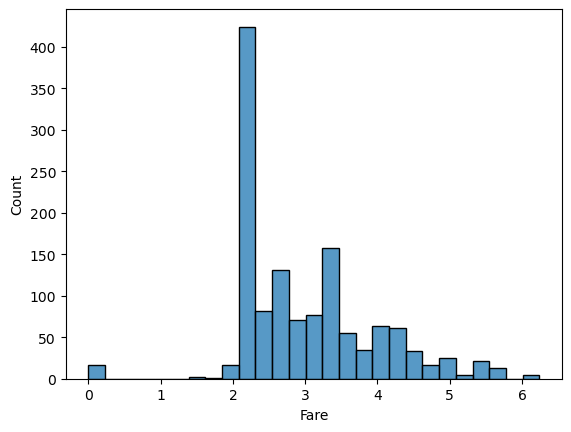

In [40]:
sns.histplot(data=df, x='Fare')

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.transform(df)
df_scaled = pd.DataFrame(data=scaled, columns=df.columns)

In [42]:
df_scaled.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,Family,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.00000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,0.647441,0.372180,0.062357,0.042781,0.477467,0.355997,0.175711,0.022918,0.064171,0.097021,0.061115,0.25974,0.441558,0.052712,0.000764,0.206264,0.093965,0.699771
std,0.486592,0.418918,0.161383,0.130207,0.096173,0.155173,0.478997,0.244811,0.149700,0.245151,0.296099,0.239633,0.43866,0.496763,0.223543,0.027639,0.404777,0.291891,0.458533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.273456,0.000000,0.000000,0.350202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.372180,0.000000,0.000000,0.438698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.436302,0.125000,0.000000,0.556696,1.000000,0.289065,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 이제 다시 학습 데이터와 테스트 데이터를 나누자
### 0 ~ 890 : 학습 데이터
### 891 ~ 1308 : 테스트 데이터

In [43]:
df_train = df_scaled.iloc[0:891, :]
df_train 

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,Family,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.273456,0.125,0.000000,0.338125,0.0,0.289065,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.473882,0.125,0.000000,0.685892,1.0,0.289065,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.323563,0.000,0.000000,0.350727,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.436302,0.125,0.000000,0.639463,1.0,0.289065,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.436302,0.000,0.000000,0.352955,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.336089,0.000,0.000000,0.422864,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,1.0,0.0,0.235876,0.000,0.000000,0.550238,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.0,1.0,0.372180,0.125,0.222222,0.512205,1.0,0.578130,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
889,1.0,0.0,0.323563,0.000,0.000000,0.550238,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
df_test = df_scaled.iloc[891:1309, :]
df_test = df_test.drop(['Survived'], axis=1)

In [45]:
df_test

,Pclass,Age,SibSp,Parch,Fare,gender,Family,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
891,1.0,0.430039,0.000,0.000000,0.348997,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
892,1.0,0.586622,0.125,0.000000,0.333195,1.0,0.289065,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
893,0.5,0.774521,0.000,0.000000,0.379604,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
894,1.0,0.336089,0.000,0.000000,0.363449,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
895,1.0,0.273456,0.125,0.111111,0.414494,1.0,0.458157,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1.0,0.372180,0.000,0.000000,0.352955,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1305,0.0,0.486409,0.000,0.000000,0.753026,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1306,1.0,0.480145,0.000,0.000000,0.338125,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1307,1.0,0.372180,0.000,0.000000,0.352955,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
df_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'gender',
       'Family', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [47]:
features = df_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'gender',
       'Family', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']]
target = df_train['Survived']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=16)

In [49]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
y_pred = lgbm_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

[1]	valid_0's binary_logloss: 0.630623
[2]	valid_0's binary_logloss: 0.600516
[3]	valid_0's binary_logloss: 0.576057
[4]	valid_0's binary_logloss: 0.55693
[5]	valid_0's binary_logloss: 0.5407
[6]	valid_0's binary_logloss: 0.526173
[7]	valid_0's binary_logloss: 0.51556
[8]	valid_0's binary_logloss: 0.506197
[9]	valid_0's binary_logloss: 0.496778
[10]	valid_0's binary_logloss: 0.489273
[11]	valid_0's binary_logloss: 0.48536
[12]	valid_0's binary_logloss: 0.481663
[13]	valid_0's binary_logloss: 0.478311
[14]	valid_0's binary_logloss: 0.474303
[15]	valid_0's binary_logloss: 0.468905
[16]	valid_0's binary_logloss: 0.465047
[17]	valid_0's binary_logloss: 0.465095
[18]	valid_0's binary_logloss: 0.462368
[19]	valid_0's binary_logloss: 0.45937
[20]	valid_0's binary_logloss: 0.460108
[21]	valid_0's binary_logloss: 0.461176
[22]	valid_0's binary_logloss: 0.459208
[23]	valid_0's binary_logloss: 0.457887
[24]	valid_0's binary_logloss: 0.457943
[25]	valid_0's binary_logloss: 0.45475
[26]	valid_0's b

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lgbm_clf, features, target, scoring='accuracy', cv=5)
print(scores)
print(np.mean(scores))

[0.76536313 0.79775281 0.83146067 0.78651685 0.8258427 ]
0.8013872324398971


In [51]:
params = {
    'num_leaves': [16, 32],
    'max_depth': [80, 90, 96],
    'min_child_samples': [20, 40]
}
sklearnFunction.print_best_parameter(lgbm_clf, params, features, target, score='accuracy', selection=0, cv_val=5)

최적의 파라메터 : {'max_depth': 80, 'min_child_samples': 40, 'num_leaves': 16} / 최적 성능(accuracy) : 0.8215617349821104


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_samples,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.147750,0.001687,0.005111,0.000127,80,20,16,"{'max_depth': 80, 'min_child_samples': 20, 'nu...",0.765363,0.786517,0.831461,0.803371,0.842697,0.805882,0.028400,7
1,0.253932,0.006160,0.006181,0.000158,80,20,32,"{'max_depth': 80, 'min_child_samples': 20, 'nu...",0.743017,0.786517,0.837079,0.792135,0.814607,0.794671,0.031423,10
2,0.129026,0.002473,0.004967,0.000224,80,40,16,"{'max_depth': 80, 'min_child_samples': 40, 'nu...",0.810056,0.814607,0.848315,0.792135,0.842697,0.821562,0.021020,1
3,0.127823,0.001901,0.004849,0.000180,80,40,32,"{'max_depth': 80, 'min_child_samples': 40, 'nu...",0.815642,0.814607,0.842697,0.792135,0.842697,0.821555,0.019197,4
4,0.151032,0.003956,0.005328,0.000128,90,20,16,"{'max_depth': 90, 'min_child_samples': 20, 'nu...",0.765363,0.786517,0.831461,0.803371,0.842697,0.805882,0.028400,7
5,0.281346,0.017431,0.006454,0.000277,90,20,32,"{'max_depth': 90, 'min_child_samples': 20, 'nu...",0.743017,0.786517,0.837079,0.792135,0.814607,0.794671,0.031423,10
6,0.134506,0.005393,0.005185,0.000111,90,40,16,"{'max_depth': 90, 'min_child_samples': 40, 'nu...",0.810056,0.814607,0.848315,0.792135,0.842697,0.821562,0.021020,1
7,0.140887,0.005700,0.005258,0.000132,90,40,32,"{'max_depth': 90, 'min_child_samples': 40, 'nu...",0.815642,0.814607,0.842697,0.792135,0.842697,0.821555,0.019197,4
8,0.242803,0.124739,0.005968,0.000549,96,20,16,"{'max_depth': 96, 'min_child_samples': 20, 'nu...",0.765363,0.786517,0.831461,0.803371,0.842697,0.805882,0.028400,7
9,0.271217,0.016933,0.006264,0.000145,96,20,32,"{'max_depth': 96, 'min_child_samples': 20, 'nu...",0.743017,0.786517,0.837079,0.792135,0.814607,0.794671,0.031423,10


In [52]:
lgbm_clf_best = LGBMClassifier(n_estomators=1000, max_depth=90, min_child_samples=40, num_leaves=32)

evals = [(X_test, y_test)]
lgbm_clf_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
y_pred = lgbm_clf_best.predict(X_test)
print(accuracy_score(y_test, y_pred))
sklearnFunction.show_clf_result(y_test, y_pred, lgbm_clf_best.predict_proba(X_test)[:, 1])

[1]	valid_0's binary_logloss: 0.630993
[2]	valid_0's binary_logloss: 0.602727
[3]	valid_0's binary_logloss: 0.579655
[4]	valid_0's binary_logloss: 0.561032
[5]	valid_0's binary_logloss: 0.545894
[6]	valid_0's binary_logloss: 0.532824
[7]	valid_0's binary_logloss: 0.522632
[8]	valid_0's binary_logloss: 0.512411
[9]	valid_0's binary_logloss: 0.504475
[10]	valid_0's binary_logloss: 0.498449
[11]	valid_0's binary_logloss: 0.493012
[12]	valid_0's binary_logloss: 0.488377
[13]	valid_0's binary_logloss: 0.483581
[14]	valid_0's binary_logloss: 0.479753
[15]	valid_0's binary_logloss: 0.476434
[16]	valid_0's binary_logloss: 0.473274
[17]	valid_0's binary_logloss: 0.467337
[18]	valid_0's binary_logloss: 0.461969
[19]	valid_0's binary_logloss: 0.45757
[20]	valid_0's binary_logloss: 0.453847
[21]	valid_0's binary_logloss: 0.451871
[22]	valid_0's binary_logloss: 0.450441
[23]	valid_0's binary_logloss: 0.450417
[24]	valid_0's binary_logloss: 0.448838
[25]	valid_0's binary_logloss: 0.450137
[26]	valid

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [53]:
y_pred = lgbm_clf_best.predict(df_test)

In [54]:
y_pred.shape

(418,)

In [55]:
 y_pred = y_pred.astype('uint64')

In [56]:
 y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
submit = pd.read_csv('../input/titanic/gender_submission.csv')

In [58]:
submit['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [59]:
submit['Survived'] = y_pred

In [60]:
submit['Survived'].value_counts()

0    283
1    135
Name: Survived, dtype: int64

In [61]:
submit.to_csv('gender_submission.csv', index=False)